(Reelle datasett)=
### Reelle datasett
   
Nå skal vi lære å analysere data fra reelle datasett 📂.
   
Vi skal ta utgangspunkt i en tabell fra SSB over utslipp av CO2-ekvivalenter fra olje- og gassutvinningsindustrien fra 1990-2022. Tabellen finner du her [SSB: Tabell 13931](https://www.ssb.no/statbank/table/13931/). 

På SSB sine nettsider kan man velge det man ønsker å ha med i en tabell. Denne tabellen kan lastes ned som flere ulike filtyper. Jeg har valgt `Semikolonseparert med overskrift (csv)` i dette eksempelet.
  
Jeg har kalt filen for `oljegass.csv`. Begynnelsen ser slik ut:

```
"13931: Klimagasser AR5, etter kilde (aktivitet), komponent, år og statistikkvariabel"

"kilde (aktivitet)";"komponent";"år";"Utslipp til luft (1 000 tonn CO2-ekvivalenter, AR5)"
"1 Olje- og gassutvinning";"Klimagasser i alt";"1990";8217
"1 Olje- og gassutvinning";"Klimagasser i alt";"1991";8107
"1 Olje- og gassutvinning";"Klimagasser i alt";"1992";8710
"1 Olje- og gassutvinning";"Klimagasser i alt";"1993";9241
"1 Olje- og gassutvinning";"Klimagasser i alt";"1994";10032
"1 Olje- og gassutvinning";"Klimagasser i alt";"1995";10211
"1 Olje- og gassutvinning";"Klimagasser i alt";"1996";11104
...
``` 

Først må jeg dele opp filen i linjer.

In [1]:
with open("oljegass.csv", "r") as file:

    # Hopper over de tre første linjene.
    for x in range(3):
        file.readline()

    # Lager liste med alle de resterende linjene.
    linjer = file.readlines()

# Går igjennom listen
for x in linjer:
    linje = x.split(";")

print(linjer[0].split(";")) # Skriver ut den første linjen for å se oppsettet

['"1 Olje- og gassutvinning"', '"Klimagasser i alt"', '"1990"', '8217\n']


Dersom jeg splitter linjene på `;` så er årstallet på indeks `2` og CO2-ekvivalenter på indeks `3`.

Vi ser også at årstallet har med seg noen ekstra anførselstegn `""`, og at CO2-ekvivalentene har med seg en nylinje-karakter `\n`. I tillegg er dataene av typen string.

- Jeg kan bruke `.strip('"')`-metoden på strings for å fjerne `""`-karakterene på starten og slutten av en string.

- Jeg kan bruke `.strip()`-metoden uten argument for å fjerne `\n`-karakteren.

- Jeg kan bruke `int()`-funksjonen for å gjøre strings til heltall.

```
for x in linjer:
    årstall = int(x.split(";")[2].strip('"'))
    co2 = int(x.split(";")[3].strip())
```

Nå gjenstår det bare å legge årstallene og CO2-ekvivalentene i hver sin liste og plotte.

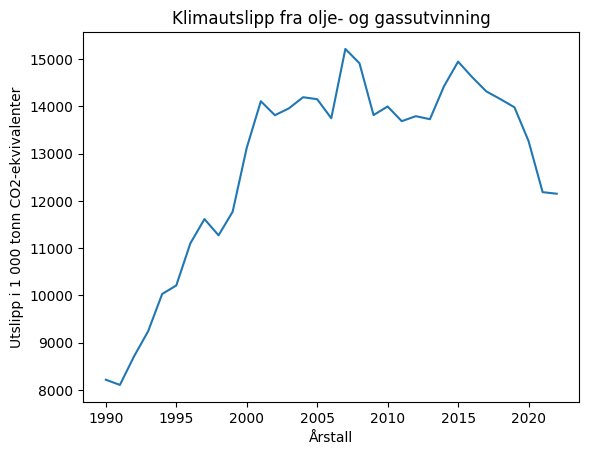

In [2]:
import numpy as np
import matplotlib.pyplot as plt

with open("oljegass.csv", "r") as file:

    # Hopper over de tre første linjene.
    for x in range(3):
        file.readline()

    # Lager liste med alle de resterende linjene.
    linjer = file.readlines()

# Lager tomme lister
xverdier = []
yverdier = []

# Går igjennom linjene og legger data i lister.
for x in linjer:
    årstall = int(x.split(";")[2].strip('"'))
    co2 = int(x.split(";")[3].strip())
    xverdier.append(årstall)
    yverdier.append(co2)

plt.title("Klimautslipp fra olje- og gassutvinning")
plt.xlabel("Årstall")
plt.ylabel("Utslipp i 1 000 tonn CO2-ekvivalenter")
plt.plot(xverdier, yverdier)
plt.show()

#### En annen metode.

Å splitte opp linjene med `split(",")`-metoden kan være problematisk. La oss se på et eksempel.

```
'1,"Mario Kart DS",DS'     ->  ['1', 'Mario Kart DS', 'DS']           ✅
'2,"Hey You, Pikachu!",PC' ->  ['2', '"Hey You', 'Pikachu!"', 'N64']  ❌
``` 

Vi ser at siden det er en komma `,` i navnet `"Hey You, Pikachu"` blir navnet også splittet opp. Dermed får vi helt feil data!

Dette kan enkelt fikses ved å bruke `csv.reader()`.

In [15]:
import csv

with open("spill_enkel.csv") as file:
    file.readline() # Hopper over første linje
    lines = list(csv.reader(file.readlines(), delimiter=",", skipinitialspace=True))

for x in lines:
    print(x)

['1', 'Mario Kart DS', 'DS']
['2', 'Hey You, Pikachu!', 'N64']
['3', 'WarioWare, Inc.: Mega MicroGame$', 'GBA']
['4', 'Horse Life 4: My Horse, My Friend, My Champion', '3DS']


Det fikset problemet 👍

---

#### Oppgaver

##### Oppgave 1
I denne oppgaven skal vi plotte data fra to reelle datasett.

1. Gå til [SSB Tabell 1391](https://www.ssb.no/statbank/table/13931/) og hent ut "Klimagasser i alt", "Utslipp til luft (1 000 tonn CO2-ekvivalenter)", alle år og "2 Industri og bergverk".
2. Så lagrer du dataene som "Semikolonseparert med overskrift(csv)" og gir filen navnet `industri.csv`.
3. Plott dataene i samme plott som dataene fra `oljegass.csv`.

Sammenlikn dataene. Hva kan du si om utviklingen av klimagassutslippene i disse to næringene?

##### Oppgave 2

Gå til [SSB sin statistikkbank](https://www.ssb.no/statbank/) og finn et datasett innenfor et tema du interesserer deg for. 

Lag et plott. Det kan være et linjediagram (`plt.plot()`), stolpediagram/søylediagram (`plt.bar()`) eller et punktdiagram (`plt.scatter()`).
